# Thesis
***

## Aspect BASED Sentiment Analysis
***
***

### Project Lifecycle 

* 1. Problem Statsement

* 2. Data Collection 

* 3. EDA

* 4. Machine Learning Approach

* 5. Result validation and Report

# 1. Problem Statement

### Import library

In [1]:
import numpy as np
import pandas as pd
import re
import time
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Data Collection and Loading

In [2]:
# Load the data
df = pd.read_csv('top_5_location.csv')

In [3]:
print(f"Size of dataframe: {df.shape[0]}")

Size of dataframe: 109923


In [4]:
print('Sample Data: ')
df[['location_id', 'comment_title', 'comment']].sample(2)

Sample Data: 


,location_id,comment_title,comment
103742,144196_45,NaN,NaN
3216,144196_42,NaN,"I found your employee to be very attentive, wh..."


In [5]:
df[['location_id', 'comment_title', 'comment']].isnull().sum()

location_id           0
comment_title    109923
comment           55010
dtype: int64

In [6]:
df.sample(2)

,index,tenant_id,tenant_name,tenant_type,tenant_industry,tenant_active,industry,location_name,location_code,location_id,location_uid,location_country,source,date,comment,comment_title,comment_num_words
82767,3166693,144196,General Motors - CIFTS,active,automotive-dealer,T,automotive-dealer,Sales - US,75,144196_75,3603738,US,SURVEY,2022-06-12,Helped change payment info,NaN,4.0
71806,2994468,144196,General Motors - CIFTS,active,automotive-dealer,T,automotive-dealer,Member Loyalty - US,39,144196_39,3603702,US,SURVEY,2022-06-14,Being that I bought an older car with no wifi ...,NaN,35.0


In [7]:
# Number of unique location and value counts
print('value counts: ')
value_count_df = df['location_uid'].value_counts()
value_count_df

value counts: 


3603702    30000
3603705    24904
3603738    21113
3603708    17505
3603735    16401
Name: location_uid, dtype: int64

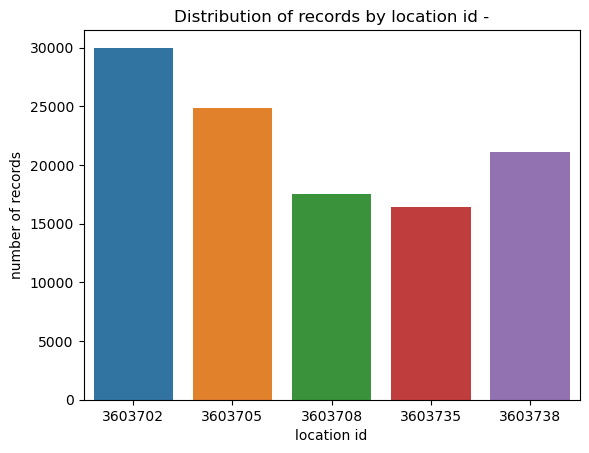

In [8]:
# Dsitribution plot
sns.barplot(x = value_count_df.index, y=value_count_df.values)
plt.title('Distribution of records by location id -')
plt.xlabel('location id')
plt.ylabel('number of records')
plt.show()

In [9]:
# Null counts
df.isnull().sum()

index                     0
tenant_id                 0
tenant_name               0
tenant_type               0
tenant_industry           0
tenant_active             0
industry                  0
location_name             0
location_code             0
location_id               0
location_uid              0
location_country          0
source                    0
date                      0
comment               55010
comment_title        109923
comment_num_words         0
dtype: int64

In [10]:
# Records containing null comments
print("Number of records containing null comments: ")
df['comment'].isnull().sum()

Number of records containing null comments: 


55010

In [11]:
# Records containing duplicate comments
print("Number of records containing duplicate comments: ")
df[df['comment'].notnull()]['comment'].duplicated().sum()

Number of records containing duplicate comments: 


4519

In [12]:
# Remove Null comments and duplicate comments rows
df = df[df['comment'].notnull()]
df = df[~df['comment'].duplicated()]

In [13]:
df.head(3)

,index,tenant_id,tenant_name,tenant_type,tenant_industry,tenant_active,industry,location_name,location_code,location_id,location_uid,location_country,source,date,comment,comment_title,comment_num_words
3,73797,144196,General Motors - CIFTS,active,automotive-dealer,T,automotive-dealer,Member Loyalty - US,39,144196_39,3603702,US,SURVEY,2022-07-26,The representative that helped me was amazing....,NaN,20.0
5,73807,144196,General Motors - CIFTS,active,automotive-dealer,T,automotive-dealer,Sales - US,75,144196_75,3603738,US,SURVEY,2022-07-29,Very nice and professional representave,NaN,5.0
6,73809,144196,General Motors - CIFTS,active,automotive-dealer,T,automotive-dealer,MyBrand App - US,45,144196_45,3603708,US,SURVEY,2022-07-29,Los recomendaría con otras personas que compre...,NaN,9.0


In [14]:
# Remove unnecessary columns
df = df[['industry', 'location_name', 'location_uid', 'comment', 'comment_num_words']]

In [15]:
# Reset the index
df.reset_index( drop = True, inplace = True)

In [16]:
# Save the formatted df
df.to_csv('formated_df.csv', index=False)

Distribution of records by location id (after removing null comments and duplicates): 


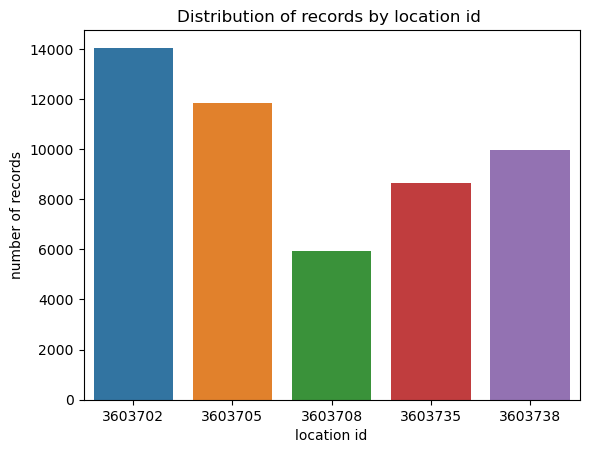

value counts: 


3603702    14043
3603705    11821
3603738     9957
3603735     8642
3603708     5931
Name: location_uid, dtype: int64

In [16]:
# Dsitribution plot
print('Distribution of records by location id (after removing null comments and duplicates): ')

value_count_df = df['location_uid'].value_counts()
sns.barplot(x = value_count_df.index, y=value_count_df.values)

plt.title('Distribution of records by location id ')
plt.xlabel('location id')
plt.ylabel('number of records')
plt.show()

print('value counts: ')
value_count_df

# 3. EDA

* Using Auto EDA library : https://github.com/Elysian01/Data-Purifier


In [17]:
import datapurifier as dp
from datapurifier import Mleda, Nlpeda, Nlpurifier, MlReport
from datapurifier import NLAutoPurifier

Distribution of Number of words in comments: 


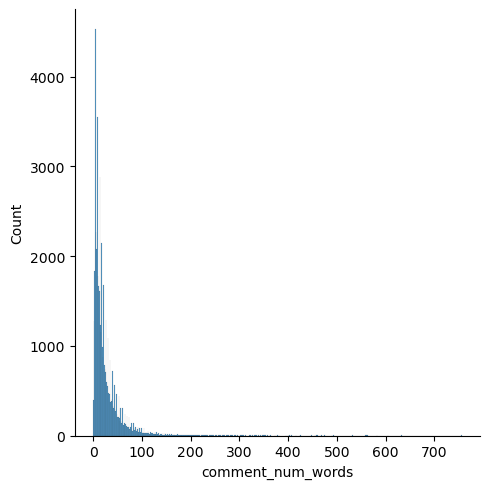

In [18]:
print('Distribution of Number of words in comments: ')
sns.displot(df['comment_num_words'])
plt.show()

box plot: 


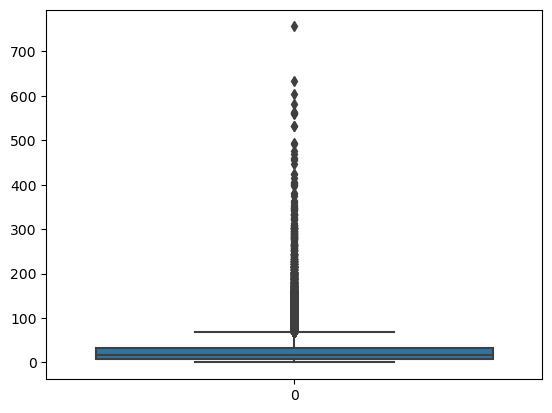

In [19]:
print('box plot: ')
sns.boxplot(df['comment_num_words'])
plt.show()

In [20]:
# Five pointer description
pd.DataFrame(df['comment_num_words'].describe())

,comment_num_words
count,50394.000000
mean,25.721435
std,32.023812
min,0.000000
25%,8.000000
50%,16.000000
75%,32.000000
max,756.000000


In [21]:
# 99 percentile of comment_num_words
np.percentile(df['comment_num_words'], 99)

152.0

* Observation -

99 percentage of data having word length less than equals to 152 words

In [22]:
# Analysing remaing comments having words greater than 99th percentile value
for idx, comment in enumerate(df[df['comment_num_words']>np.percentile(df['comment_num_words'], 99)]['comment']):
    print('-'*100)
    print('idx: ', idx)
    print(comment)

----------------------------------------------------------------------------------------------------
idx:  0
I haven't been driving or traveling a lot this past year so when I went out on Fri. Sept 17, I sat in the driveway and pressed the OnStar button to get to an adviser. I asked to renew my OnStar for one year. It was $426.39 Wow... outrageous but I value the security that OnStar brings so OK... That evening I phoned OnStar from my home phone and got a great adviser. Why the enormous change from last year's renewal of only $202 ??? It seems that the first adviser, decided without asking me, to push me to a higher level. Bait and switch is a really low level deceptive sales method and unworthy of a fine company like OnStar. The second adviser was understanding and very helpful. I will be given a credit on my Mastercard for the $426.39 and was now charged $204.66. What an improvement. The second adviser gave me excellent customer service and restored my trust in OnStar. I would sugge

* Observation

In [23]:
# Analysing remaing comments having words greater than 25th percentile value
for idx, comment in enumerate(df[df['comment_num_words']>np.percentile(df['comment_num_words'], 25)]['comment'].iloc[:100]):
    print('-'*100)
    print('idx: ', idx)
    print(comment)

----------------------------------------------------------------------------------------------------
idx:  0
The representative that helped me was amazing. She was kind, professional and went over and beyond what I had expected!
----------------------------------------------------------------------------------------------------
idx:  1
Los recomendaría con otras personas que compren en Chevrolet
----------------------------------------------------------------------------------------------------
idx:  2
I did not have any problems - I renewed my Protetion Plan and everything went smoothly.
----------------------------------------------------------------------------------------------------
idx:  3
Let my coverage without notice expire then tried to upsell me to a different plan.
----------------------------------------------------------------------------------------------------
idx:  4
I didn’t get the answer that I wanted. I went forward and have continued to drive my car. I wonder (bei

* Observation

In [24]:
# Number of records having comment words> 99th percentile word length
print("Number of records having comment words> 99th percentile word length:  ")
len(df[df['comment_num_words']>np.percentile(df['comment_num_words'], 99)])


Number of records having comment words> 99th percentile word length:  


499

* Intuition

Comments having high word lenth doesn't add much to the overall aspect's sentiment. Rather sometimes it can even cause bais towards a certain aspect's sentiment.

In [25]:
# Removing the records having comment words> 99th percentile word length
df = df[df['comment_num_words']<=np.percentile(df['comment_num_words'], 99)]

In [26]:
print(df.shape)

(49895, 5)


In [27]:
# Auto Eda Using Data-Purifier
# Ref: https://github.com/Elysian01/Data-Purifier
eda = Nlpeda(df, "comment", analyse="basic")



Congrats!!, The Dataframe has NO NULL VALUES

Starting execution of 'basic_eda' function, Please wait...
Dataframe contains 49895 rows and 5 columns



,industry,location_name,location_uid,comment,comment_num_words,word_counts,char_counts,average_word_lengths,stop_words_counts
0,automotive-dealer,Member Loyalty - US,3603702,The representative that helped me was amazing....,20.0,20,119,5.000000,10
1,automotive-dealer,Sales - US,3603738,Very nice and professional representave,5.0,5,39,7.000000,1
2,automotive-dealer,MyBrand App - US,3603708,Los recomendaría con otras personas que compre...,9.0,9,60,5.777778,0
3,automotive-dealer,Sales - US,3603738,I did not have any problems - I renewed my Pro...,15.0,16,87,4.500000,7
4,automotive-dealer,Sales - US,3603738,Let my coverage without notice expire then tri...,15.0,15,82,4.533333,7


Finished execution of 'basic_eda' function in 0.420 secs


Sentiment Analysis:


interactive(children=(Checkbox(value=False, description='Perform Sentiment Analysis'), Output()), _dom_classes…


Distribution Analysis:


Output()


EDA Completed!

type <obj>.df to access explored dataframe



Congrats!!, The Dataframe has NO NULL VALUES

Enter Word and find its count: 


interactive(children=(Text(value='', description='Word', placeholder='Enter Your word here'), Output()), _dom_…

Plot Wordcloud: 


interactive(children=(Checkbox(value=False, description='Plot Wordcloud'), Output()), _dom_classes=('widget-in…

Unigram Analysis: 


interactive(children=(Checkbox(value=False, description='Perform Unigram'), Output()), _dom_classes=('widget-i…

Bigram Analysis: 


interactive(children=(Checkbox(value=False, description='Perform Bigram'), Output()), _dom_classes=('widget-in…

Trigram Analysis: 


interactive(children=(Checkbox(value=False, description='Perform Trigram'), Output()), _dom_classes=('widget-i…

Plot Ngram Plots: 


interactive(children=(Checkbox(value=False, description='Start Plotting'), Output()), _dom_classes=('widget-in…

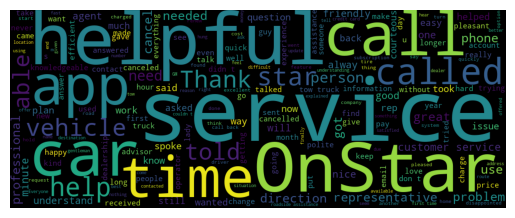

In [28]:
# Auto Eda Using Data-Purifier
# Ref: https://github.com/Elysian01/Data-Purifier
eda = Nlpeda(df, "comment", analyse="word")

* Observation

    Bigram and Trigram indicates that comments have mostly belows topics -
    1. Customer service
    2. Application (App)
    3. Assistance and Speed
    4. Service provider (OnStar)
    5. Auto Parts (like flat tire, engine light)
    6. Skills and competence
    
    * These insights can help in choosing appropriate aspect terms.

In [105]:
# Save the final forammted df
df.to_csv('formatted_df.csv', index=False)

End